<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Michael_Bundick_DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [2]:
#first inspection
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [209]:
#Convert 'show' to datetime. Not sure why there is year and show airdate
df['Show'] = pd.to_datetime(df['Show'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 6 columns):
Year                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null datetime64[ns]
Group                        2662 non-null object
Guest                        2693 non-null object
Occupation                   2693 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 126.3+ KB


In [252]:
#Show count was fairly steady each year except Jon's final season
#This is a really bland graph since the values are all so close
df['Year'].value_counts().sort_index()

1999    166
2000    169
2001    157
2002    159
2003    166
2004    164
2005    162
2006    161
2007    141
2008    164
2009    163
2010    165
2011    163
2012    164
2013    166
2014    163
2015    100
Name: Year, dtype: int64

In [227]:
#Nulls
df.isnull().sum()

Year                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Guest                         0
Occupation                    0
dtype: int64

In [229]:
#Like magic they are gone, filled with 'Misc'
df['Group'] = df['Group'].fillna('Misc')
df['GoogleKnowlege_Occupation'] = df['GoogleKnowlege_Occupation'].fillna('Misc')
df.isnull().sum()

Year                         0
GoogleKnowlege_Occupation    0
Show                         0
Group                        0
Guest                        0
Occupation                   0
dtype: int64

In [0]:
#Create a table of appearances by occuppation and year,...
#then normalize and multiply by 100 for the percent
ds_app_rate = pd.crosstab(df['Year'], df['Occupation'], normalize='index')* 100

###Percent of Guests by Occupation on 'The Daily Show'

In [255]:
ds_app_rate

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


# Part 2 — Recreate this explanatory visualization:

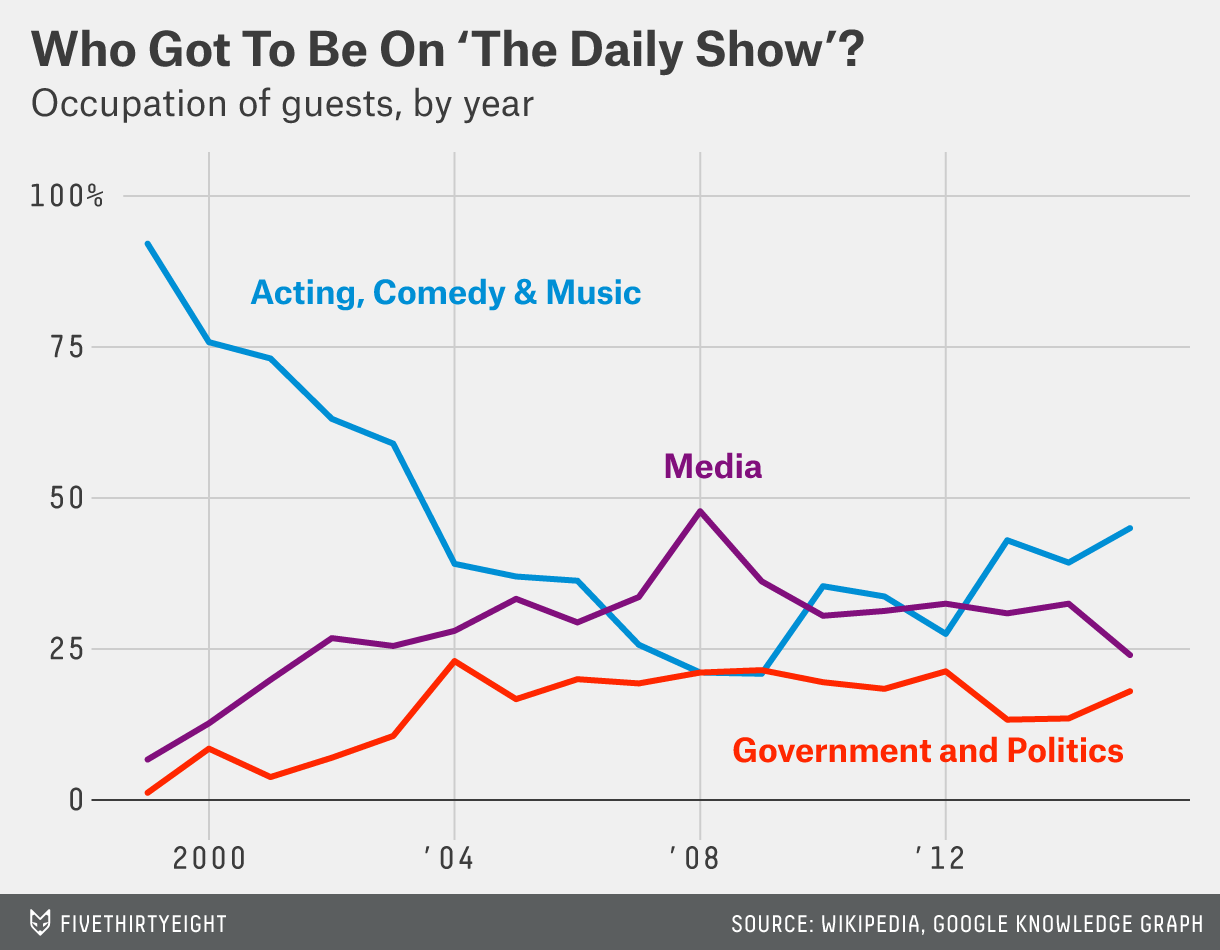

In [43]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

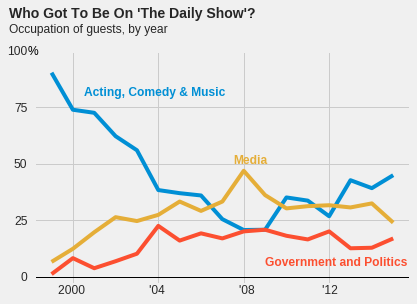

In [256]:
#set the style to fivethirtyeight
plt.style.use('fivethirtyeight');

#create ax instance of the plot
ax = ds_app_rate[['Acting, Comedy & Music', 'Government and Politics', 'Media']].plot();

#Remove the legend, replace with labels next to each line
ax.get_legend().remove();
ax.text(x=2000.5,y=80, s="Acting, Comedy & Music", fontsize=12, fontweight='bold', color=('#008fd5'));
ax.text(x=2009,y=5, s="Government and Politics", fontsize=12, fontweight='bold', color=('#fc4f30'));
ax.text(x=2007.5,y=50, s="Media", fontsize=12, fontweight='bold', color=('#e5ae38'));

#Set x and y axis spacing and labels
ax.set(yticks=range(0,101,25));
ax.xaxis.set_ticks(np.arange(2000, 2013, 4));
ax.grid(True);
ax.set_xticklabels([]);
ax.tick_params(axis='both', which='major', labelsize=12);

#Details to x and y labels
ax.text(x=1997.9, y=98.1, s='%', fontsize=12, color='black');
ax.text(x=1999.3, y=-7.5, s="2000                   '04                      '08                    '12", fontsize=12);

#Set title and Subtitle
ax.text(x=1997, y=114.5, s="Who Got To Be On 'The Daily Show'?", fontsize=14, fontweight='bold');
ax.text(x=1997, y=108, s="Occupation of guests, by year", fontsize=12);

#Highlight the x axis at 0
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel('');

#This was supposed to be the grey line at the bottom of the graph but it was whiting out my 100% for some reason
# plt.axhline(y=-17, xmin=-.05, xmax=1, clip_on=False, linewidth=17, color='grey')
# ax.text(x=1998.3, y=-18.5, s="FIVETHIRTYEIGHT", fontsize=10, color='white');
# ax.text(x=2006, y=-17, s="SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH", fontsize=8, color='white');

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [136]:
#Look at the top ten
df['Guest'].value_counts()[0:10]

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Tom Brokaw        12
Will Ferrell      10
Reza Aslan        10
Richard Lewis     10
Bill O'Reilly     10
Name: Guest, dtype: int64

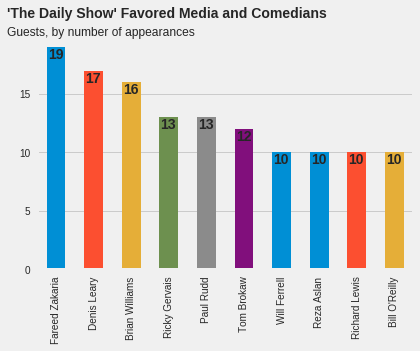

In [175]:
#Set fivethirtyeight style
plt.style.use('fivethirtyeight');

#new ax instance of our plot to manipulate settings
ax = df['Guest'].value_counts()[0:10].plot.bar();

#Change the tick and label spacing on the y axis
ax.set(yticks=range(0,20,5));
#Turn off the x-axis grid lines, leave the labels
ax.grid(b=False, axis='x')

#Give it a declarative title like most of fivethirtyeight's
ax.text(x=-1.3, y=21.5, s="'The Daily Show' Favored Media and Comedians", fontsize=14, fontweight='bold');
ax.text(x=-1.3, y=20, s="Guests, by number of appearances", fontsize=12);

#Place the value count at the top of each bar like suggested
ax.text(x=-.22, y=18, s='19', fontweight='bold');
ax.text(x=.78, y=16, s='17', fontweight='bold');
ax.text(x=1.78, y=15, s='16', fontweight='bold');
ax.text(x=2.78, y=12, s='13', fontweight='bold');
ax.text(x=3.78, y=12, s='13', fontweight='bold');
ax.text(x=4.78, y=11, s='12', fontweight='bold');
ax.text(x=5.78, y=9, s='10', fontweight='bold');
ax.text(x=6.78, y=9, s='10', fontweight='bold');
ax.text(x=7.78, y=9, s='10', fontweight='bold');
ax.text(x=8.78, y=9, s='10', fontweight='bold');